
## **Case Study: A better Smoker Detector**

**Objective:**

In this notebook, you will work on the insurance csv file. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.

-------

## **Dataset Description**


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## **1. Data Loading**

#### **Import necessary python modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7,7)
#used to configure the Matplotlib plotting library for inline plotting and to set the default figure size, respectively.

In [3]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/SDAIA/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##**2. Exploratory Data Analysis (EDA)**

**Question 1:** how many rows & columns in our dataset

In [6]:
rows = df.shape[0]
columns = df.shape[1]
print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


In [7]:
#Other way
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#Using the function **describe()**, we can check the mean, standard deviation,
#maximum, and minimum of each numerical feature (column)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1335.0,30.661423,6.101038,15.9600,26.30250,30.400,34.687500,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

**Question 2:** Select the instances where the data.smoker == "yes" and the ones where the data.smoker == "no". Save them in smokers and non_smokers dataframes respectively. Then count how many you have in each category.

In [11]:
# select smokers
smokers = df[df['smoker'] == 'yes']
# select non smokers
non_smokers = df[df['smoker'] == 'no']
print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


**Question 3:** Is your data balanced?

`A:The distribution of smoking status is unequal, with non-smokers constituting a larger proportion of the sample. `

--------------------------

### **Let's start by seeing how much each feature tells us about a person being  a smoker or not.**

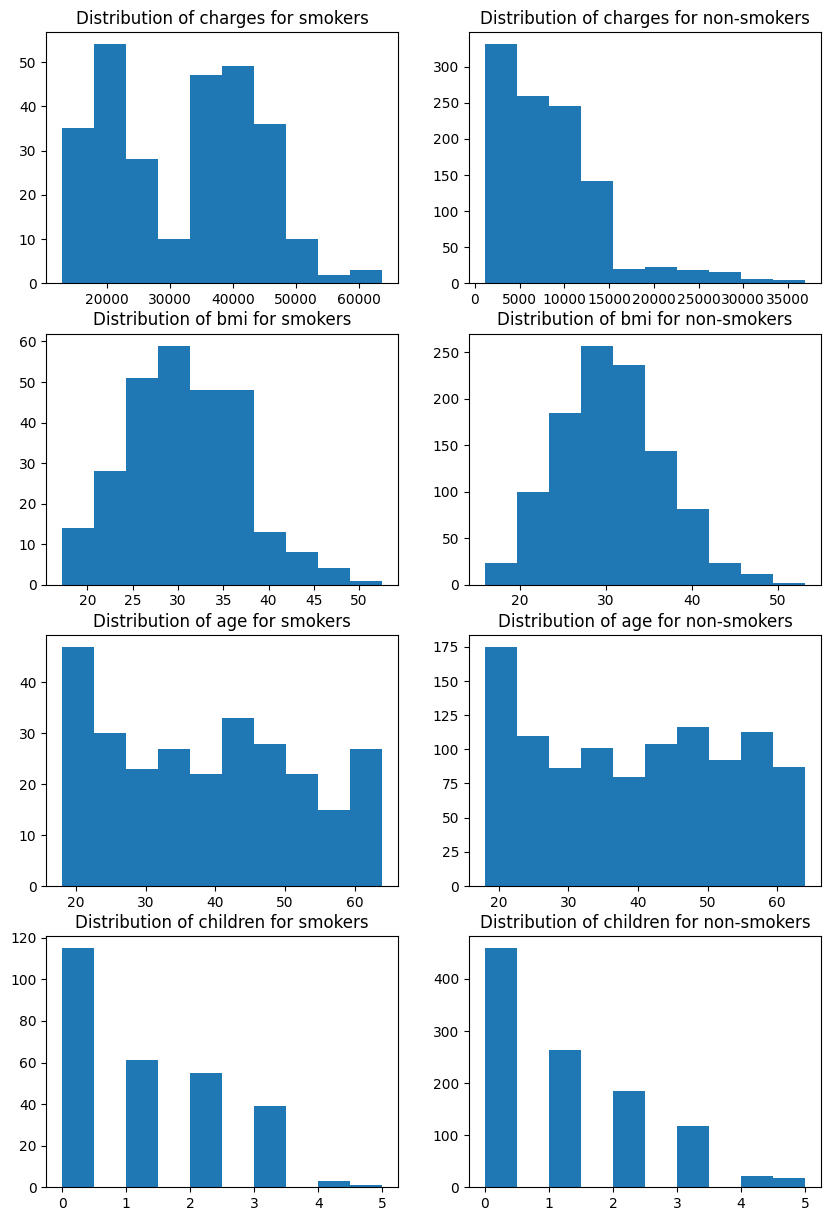

In [12]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

**Question 4:** From the above histograms, deduce which feature tells us the most about a person being smoker or not?

`The "Charges" plot.`


###**Now let's see if the gender influences being a smoker or not.**

smoker   no  yes
sex             
female  547  115
male    517  159


<Axes: xlabel='sex'>

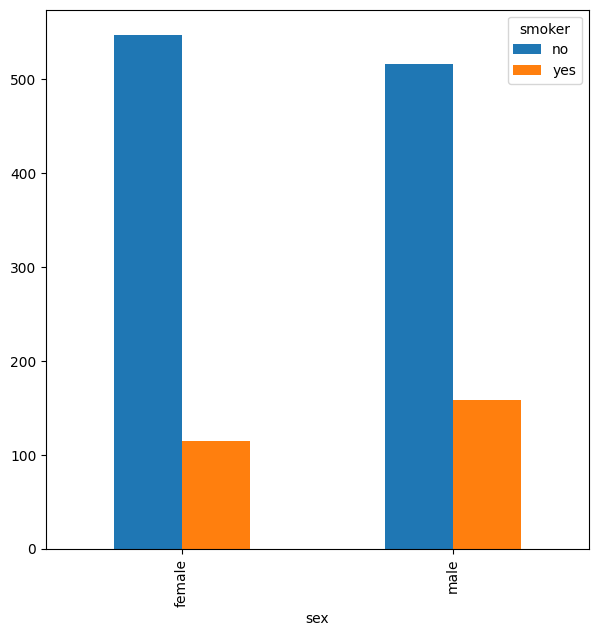

In [13]:
Gender = pd.crosstab(df['sex'],df['smoker'])
print(Gender)
Gender.plot(kind='bar')

**Question 5:** What can you conclude about the gender and the smoker status?

`The ratio of smokers to non-smokers is similar for both genders, suggesting that expenses might not vary significantly with respect to the 'sex' feature.`

## **3. Data Preprocessing**
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

**Question 6:** How many missing value are there in each column?

In [14]:
# print how many missing value in each column
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# drop rows with missing values
df.dropna(inplace=True)

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



**Question 7:**


*   Replace male and female with 0 and 1
*   Replace smoker and non smoker represented by yes and no in the dataframe with 0 and 1



In [18]:
# define dictionary
encoding_dict = {
    'sex': {'male': 0, 'female': 1}
}
df.replace(encoding_dict, inplace=True)
# print head to verify
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


**And now the smokers column**

In [19]:
# define dictionary
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
df['smoker'] = df['smoker'].apply(lambda x: smokers[x])
# print head to verify
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


**And now the Region Column**

In [20]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
# replace region column with the corresponding values
df['region'] = df['region'].apply(lambda x: regions[x])
# print head to verify
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


##**Normalization**

**Question 7:** Let's scale all the columns by dividing by the maximum

In [21]:
# get the max of each column
df.max()

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [22]:
# divide each column by its maximum value
df = df/df.max()

## **4. Model Training & Testing**



### **Data splits**

**Question 8:** Before training, we need to split data into training (80%) & testing (20%)

In [23]:
features = ['age',	'sex',	'bmi',	'children', 'region',	'charges']
X = df[features]
y = df['smoker']

In [24]:
# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


### **Logistic Regression Modeling**


In [26]:
# define our regression model
model = LogisticRegression()
# train our model
model.fit(x_train, y_train)

LogisticRegression()

### **Evaluation**

In [27]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model_1 = accuracy_score(y_pred, y_test)
precision_model1 = precision_score(y_test, y_pred)
recall_model1 = recall_score(y_test, y_pred)
f1_score_model1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model1,
      "\nRecall:", recall_model1,
      "\nF1 Score:", f1_score_model1)

Accuracy: 0.8951310861423221 
Precision: 0.9117647058823529 
Recall: 0.5535714285714286 
F1 Score: 0.6888888888888888


We can see that the recall, and the f1 score can be improved.

**Question 9:** What can you do to improve results?

```
- Data augmentation:
 Enhance the dataset by collecting additional data,
 resampling existing data through techniques like under or oversampling, or generating new features to improve model performance.

- Data enrichment:
Consider data collection strategies, resampling methods like under or oversampling, and feature engineering approaches to enrich the
dataset and potentially improve model generalizability.




##5.** Model Improvement**

####Handle data Imbalance

<Axes: >

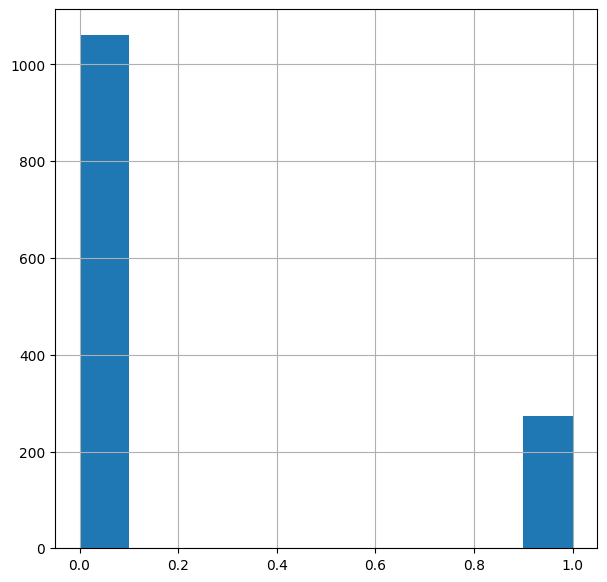

In [28]:
df['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(x_new, y_new)

(array([530.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

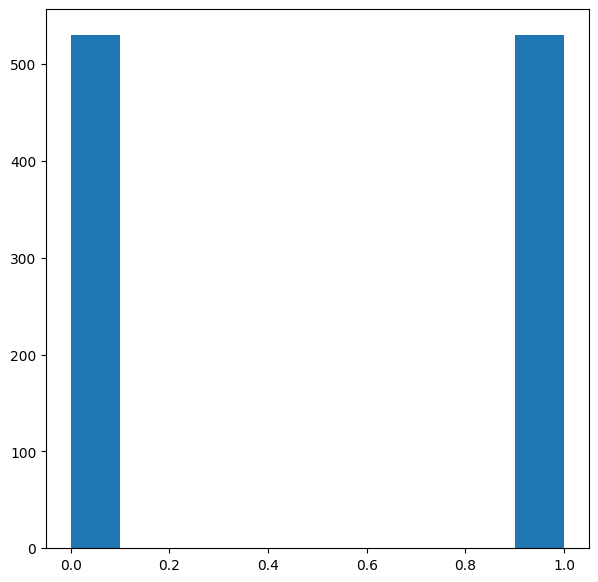

In [30]:
plt.hist(y_new)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(x_test)

accuracy_model2 = accuracy_score(y_test, y_pred)
precision_model2 = precision_score(y_test, y_pred)
recall_model2 = recall_score(y_test, y_pred)
f1_score_model2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model2,
      "\nPrecision:",precision_model2,
      "\nRecall:", recall_model2,
      "\nF1 Score:", f1_score_model2)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


We can see how much our scores got better when we balanced our dataset.